In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from google.colab import drive
drive.mount('/content/gdriv')

Mounted at /content/gdriv


In [4]:
data_path = '/content/gdriv/My Drive/Colab Notebooks'
BCI = pd.read_csv(data_path+'/data/BCI.csv')
BCI.head()

,date,BCI
0,1999-Mar-01,1000
1,1999-Mar-02,1009
2,1999-Mar-03,1014
3,1999-Mar-04,1013
4,1999-Mar-05,1005


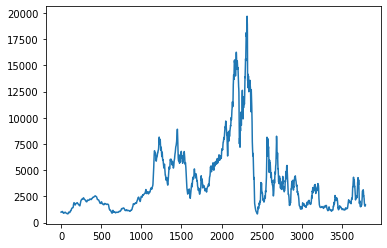

In [5]:
plt.plot(BCI['BCI'])
plt.show()

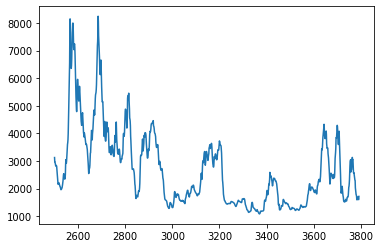

3793


In [6]:
BCI = BCI.iloc[2500:,:]
plt.plot(BCI['BCI'])
plt.show()
sc = MinMaxScaler()
dt = sc.fit_transform(bdi.iloc[:,1:2])
print(len(dt))

In [7]:
train_size= int(len(dt) * 0.67)
test_size = len(dt) - train_size
train = np.array(dt[0:train_size])
test = np.array(dt[train_size:])
print(len(train))
print(len(test))

2541
1252


In [8]:
test

array([[0.08553853],
       [0.0813491 ],
       [0.08018243],
       ...,
       [0.04152304],
       [0.04083364],
       [0.0469852 ]])

In [10]:
#!pip install pmdarima
import pmdarima as pm
model = pm.auto_arima(train, error_action='ignore', trace=1,
                      suppress_warnings=True,
                      seasonal=True)

     |████████████████████████████████| 1.4 MB 5.0 MB/s 
     |████████████████████████████████| 9.8 MB 37.7 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-19596.120, Time=3.50 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-17436.103, Time=0.28 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-19329.982, Time=0.37 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-18943.624, Time=1.98 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-17438.062, Time=0.16 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-19588.793, Time=2.99 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-19584.037, Time=0.66 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-19594.515, Time=1.73 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-19591.609, Time=1.25 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-19515.983, T

In [11]:
n_periods = len(test)
pred, confint = model.predict(n_periods=n_periods, return_conf_int=True)
print(pred)

[0.08535869 0.08346988 0.08290392 ... 0.08306566 0.08306566 0.08306566]


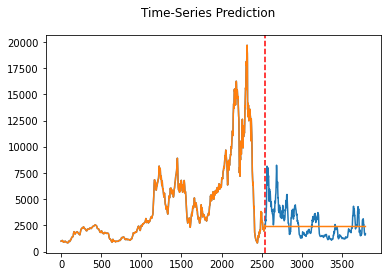

In [12]:
pred = pd.concat([pd.DataFrame(train),pd.DataFrame(pred)])
real = pd.concat([pd.DataFrame(train),pd.DataFrame(test)])
data_predict = pred.values
data_predict = sc.inverse_transform(data_predict)
real = sc.inverse_transform(real.values)

plt.axvline(x=train_size, c='r', linestyle='--')

plt.plot(real)
plt.plot(data_predict)
plt.suptitle('Time-Series Prediction')
plt.show()